In [1]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from voltagebudget.neurons import adex
from voltagebudget.util import read_results
from voltagebudget.util import read_stim
from voltagebudget.util import read_args
from voltagebudget.util import read_modes
from voltagebudget.util import nearest_spike
from voltagebudget.util import write_spikes
from voltagebudget.util import locate_firsts
from voltagebudget.util import filter_spikes
from voltagebudget.util import budget_window
from voltagebudget.util import locate_peaks
from voltagebudget.util import write_spikes
from voltagebudget.util import write_voltages
from voltagebudget.util import mad
from voltagebudget.util import mae
from voltagebudget.util import select_n
from voltagebudget.util import score_by_group
from voltagebudget.util import score_by_n
from voltagebudget.util import find_E
from voltagebudget.util import find_phis

# Config

In [2]:
stim = "../../data/stim1.csv"
mode = "regular"

N = 10
time = 1.0
time_step = 1e-5

f = 8
A = 0.05e-9
phi = 0
sigma = 0

w_in = (3e-10, 3e-9)

I_osc_index = None
I_osc_index = [0, 1, 9]

# Load

In [3]:
params, w_in, bias_in, _ = read_modes(mode)

In [4]:
stim_data = read_stim(stim)
ns_stim = np.asarray(stim_data['ns'])
ts_stim = np.asarray(stim_data['ts'])

# Run

In [5]:
ns, ts, voltages = adex(
        N,
        time,
        ns_stim,
        ts_stim,
        w_in=w_in,
        bias_in=bias_in,
        f=f,
        A=A,
        phi=phi,
        sigma=sigma,
        n_cycles=10,
        E=0.0,
        I_osc_index=I_osc_index,
        budget=True,
        save_args=None,
        time_step=time_step,
        seed_value=42,
        **params)

WARNING    "tau_in" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 0.005. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "V_l" is an internal variable of group "neurongroup", but also exists in the run namespace with the value -0.07. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "delta_t" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 0.002. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "C" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 2e-10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "bias_in" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 5e-11. The

In [6]:
voltages.keys()

dict_keys(['tau_m', 'times', 'I_ext', 'I_osc', 'I_osc_mat', 'V_budget', 'V_m', 'V_m_thresh', 'V_comp', 'V_osc', 'V_free', 'V_rheo', 'V_rest', 'V_leak', 'V_cut', 'V_thresh', 'V_t'])

# Visualize

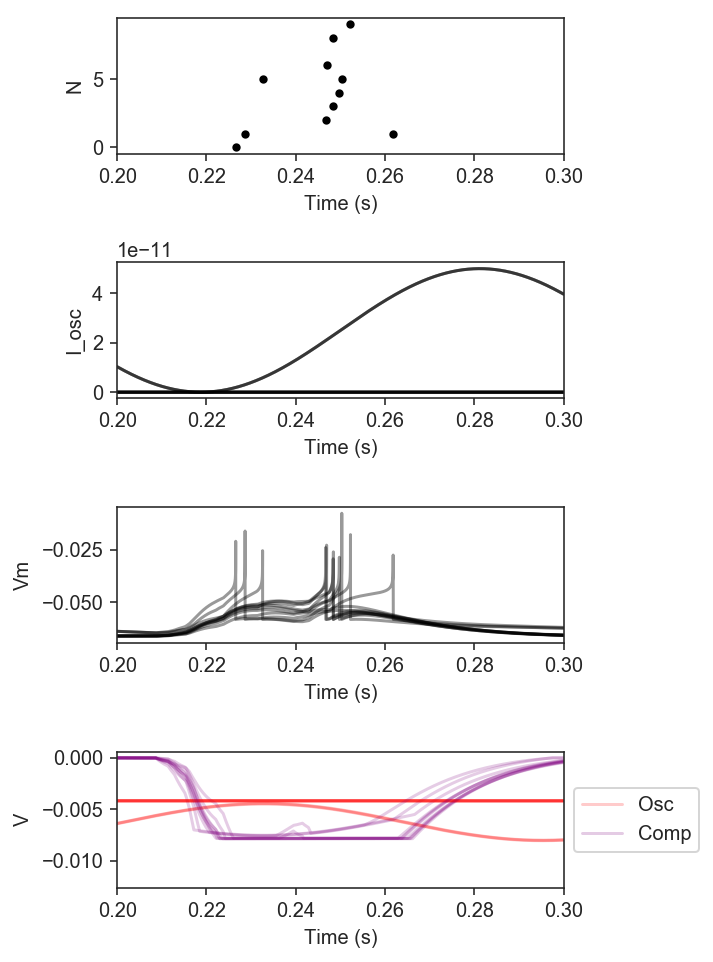

In [7]:
# Plotz
fig = plt.figure(figsize=(4, 8))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Spikes
plt.subplot(grid[0, 0])
plt.scatter(ts, ns, color="black", alpha=1, s=10, label="Bandit")
plt.xlim(0.2, 0.3)
plt.ylabel("N")
plt.xlabel("Time (s)")

# I_ext
plt.subplot(grid[1, 0])
for n in range(N):
    plt.plot(voltages['times'], voltages['I_osc_mat'][:,n], color="black", alpha=0.4)
plt.xlim(0.2, 0.3)
plt.xlabel("Time (s)")
plt.ylabel("I_osc")

# Vm
plt.subplot(grid[2, 0])
for n in range(N):
    plt.plot(voltages['times'], voltages['V_m'][n,:], color="black", alpha=0.4)
    plt.xlim(0.2, 0.3)
plt.xlabel("Time (s)")
plt.ylabel("Vm")

plt.subplot(grid[3, 0])
for n in range(N):
    if n == 0:
        plt.plot(voltages['times'], voltages['V_osc'][n,:], color="red", alpha=0.2, label="Osc")
        plt.plot(voltages['times'], voltages['V_comp'][n,:], color="purple", alpha=0.2, label="Comp")
    else:
        plt.plot(voltages['times'], voltages['V_osc'][n,:], color="red", alpha=0.2)
        plt.plot(voltages['times'], voltages['V_comp'][n,:], color="purple", alpha=0.2)

plt.xlim(0.2, 0.3)
plt.xlabel("Time (s)")
plt.ylabel("V")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))